In [1]:
import pandas as pd

In [3]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', parse_dates=[0])

In [6]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [7]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()

In [8]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [9]:
yearly_total_miles_df = miles_df.resample('A', on="Month").sum()

In [10]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


In [11]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean()

In [14]:
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [15]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')

In [17]:
interpolated_miles_df.head()

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065


<AxesSubplot: xlabel='Month'>

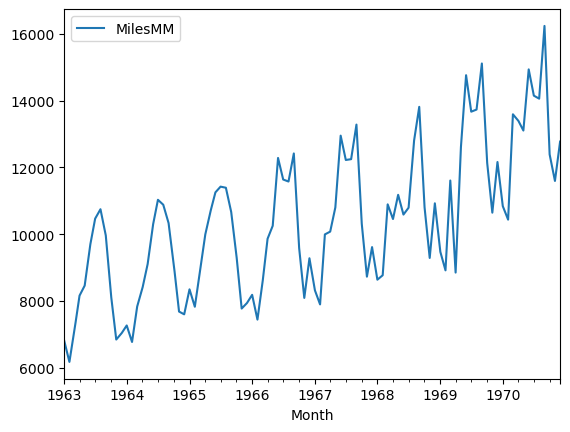

In [18]:
interpolated_miles_df.plot()

In [19]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='spline', order=2)

<AxesSubplot: xlabel='Month'>

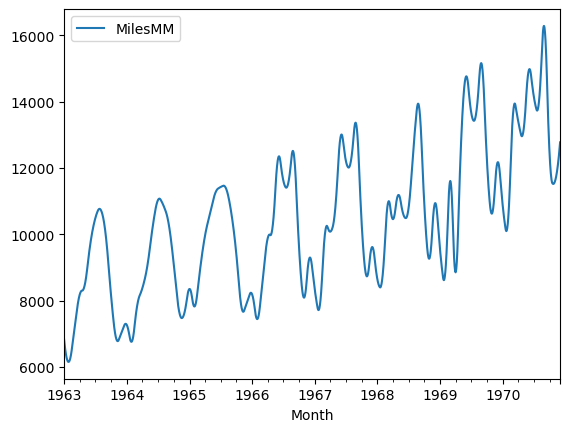

In [20]:
poly_interpolated_miles_df.plot()

In [21]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<AxesSubplot: >

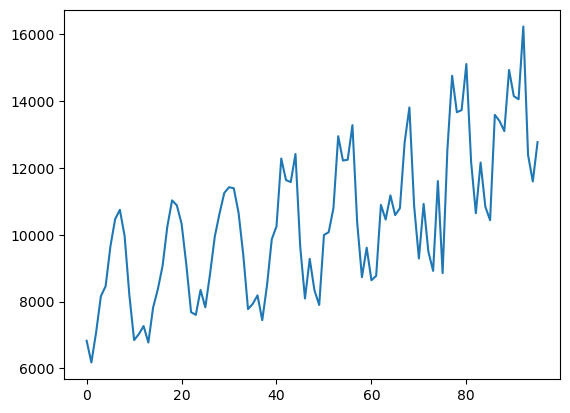

In [22]:
miles_df["MilesMM"].plot()

In [23]:
import seaborn as sns

<AxesSubplot: ylabel='MilesMM'>

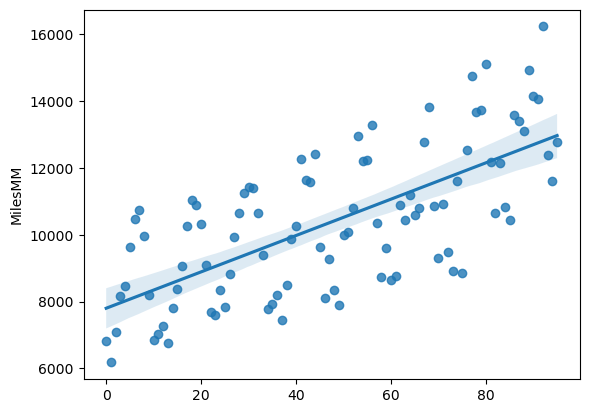

In [24]:
sns.regplot(x= miles_df.index.values, y=miles_df['MilesMM'])

In [25]:
miles_df['year']= miles_df['Month'].dt.year

In [26]:
miles_df.head(2)

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963


In [28]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot: xlabel='year'>

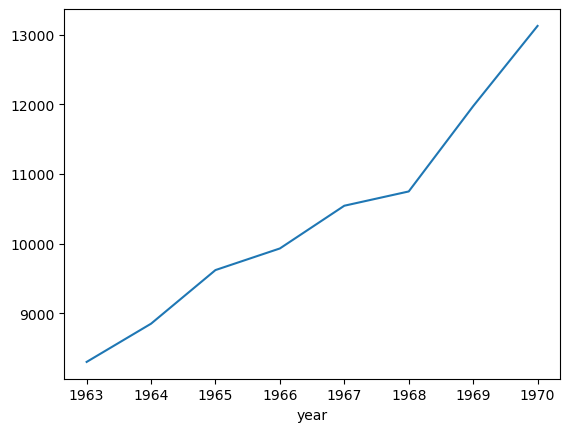

In [29]:
miles_df.groupby('year')['MilesMM'].mean().plot()